In [1]:
import numpy as np 
import plot_helpers
import matplotlib.pyplot as plt

In [2]:
num_points = 100 
xmin = 0
xmax = 10
noise = 0.2
# create 1-D input data
X = np.reshape(np.linspace(xmin, xmax, num_points), [-1, 1])
# true functional response
F = X + np.sin(X * 5) - np.cos(X * 10)
# generate noisy labels
Y = F + noise * np.random.randn(num_points, 1)
# Training Data
training_idx = np.arange(0, 50, 2) 
Xtr = X[training_idx , :]
Ytr = Y[training_idx]
# Test Data
test_idx = np.setdiff1d(np.arange(0, num_points,1), training_idx)
Xtest = X[test_idx , :] 
Ytest = Y[test_idx]

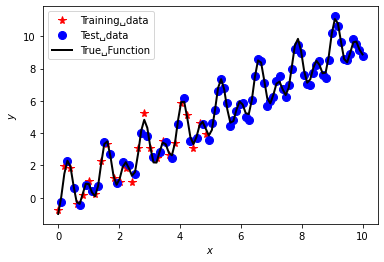

In [3]:
# plot data
fig = plt.subplot(111)
opt = {'marker': 'r*', 'label': 'Training␣data'} 
plot_helpers.plot_data(Xtr, Ytr, fig=fig, options=opt)
opt = {'marker': 'bo', 'label': 'Test␣data'} 
plot_helpers.plot_data(Xtest, Ytest, fig=fig, options=opt) 
opt = {'marker': 'k-', 'label': 'True␣Function',
'x_label': '$x$', 'y_label': '$y$', 'legend': True,
'linewidth': 2}
plot_helpers.plot_data(X, F, fig=fig, options=opt)

In [28]:
# problem 1
from numpy import linalg as la
from sklearn.metrics import mean_squared_error

In [29]:
def kerpoly(x1,x2,d):
    return (1+np.dot(x1,x2))**d

In [30]:
def calculate_alpha(Xtr, Ytr, polydegree=1, lam=0.01):
    n = len(Xtr)
    Kernel = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            Kernel[i,j] = kerpoly(Xtr[i],Xtr[j],polydegree)
    w, v = la.eig(Kernel)
    w = 1/(w + (n*lam))
    M = v@np.diag(w)@v.T
    alpha = np.real(M@Ytr)
    

    return alpha

In [34]:
def predict(alpha, Xtr, Xtest,deg):
    Yhat = np.zeros(m)
    for i in range(m):
        for j in range(n):
            Yhat[i] = Yhat[i] + alpha[j]*kerpoly(Xtr[j],Xtest[i],deg)
            
    return Yhat

In [35]:
# d = 1 
alpha = calculate_alpha(Xtr,Ytr)
n = len(alpha)
m = len(Xtest)
Yhat1 = predict(alpha,Xtr,Xtest,1)
MSE1 = mean_squared_error(Yhat1, Ytest)
print(MSE1)

1.1046482671423787


In [36]:
# d = 2
alpha = calculate_alpha(Xtr,Ytr,polydegree=2)
n = len(alpha)
m = len(Xtest)
Yhat2 = predict(alpha,Xtr,Xtest,2)
MSE2 = mean_squared_error(Yhat2, Ytest)
print(MSE2)

1.122715084861394


In [37]:
# d = 3
alpha = calculate_alpha(Xtr,Ytr,polydegree=3)
n = len(alpha)
m = len(Xtest)
Yhat3 = predict(alpha,Xtr,Xtest,3)
MSE3 = mean_squared_error(Yhat3, Ytest)
print(MSE3)

108.55065627078943


In [38]:
print('When degree d=1, MSE of the model is {:.2f}. When degree d=2, MSE of the model is {:.2f}. When degree d=3, MSE of the model is {:.2f}.'.format(MSE1,MSE2,MSE3))

When degree d=1, MSE of the model is 1.10. When degree d=2, MSE of the model is 1.12. When degree d=3, MSE of the model is 108.55.


In [12]:
# problem 2

In [39]:
def kerper(x1,x2,h,q):
    
    return np.exp(-2*np.sin(la.norm(x1-x1,ord=q))**2/h)

In [55]:
def predict1(alpha, Xtr, Xtest,deg,h,q):
    Yhat = np.zeros(Xtest.shape[0])
    for i in range(Xtest.shape[0]):
        for j in range(n):
            Yhat[i] = Yhat[i] + alpha[j]*(kerpoly(Xtr[j],Xtest[i],deg) + kerper(Xtr[j],Xtest[i],h,q))
            
    return Yhat

In [56]:
def calculate_alpha1(Xtr, Ytr, polydegree=1, lam=0.01, h=0.2, q=1):
    n = len(Xtr)
    Kernel = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            Kernel[i,j] = kerpoly(Xtr[i],Xtr[j],polydegree) + kerper(Xtr[i],Xtr[j],h,q)
    w, v = la.eig(Kernel)
    w = 1/(w + (n*lam))
    M = v@np.diag(w)@v.T
    alpha = np.real(M@Ytr)
    

    return alpha

In [57]:
# d = 1 h = 0.2 q = 1
alpha = calculate_alpha1(Xtr,Ytr)
n = len(alpha)
m = len(Xtest)
Yhat1 = predict1(alpha,Xtr,Xtest,1,0.2,1)
MSE1 = mean_squared_error(Yhat1, Ytest)
print(MSE1)

1.1067094638924502


In [58]:
print('For Kernel_sum, MSE is {:.2f}'.format(MSE1))

For Kernel_sum, MSE is 1.11


In [60]:
Yhat2 = predict1(alpha,Xtr,Xtr,1,0.2,1)
Xtemp = np.concatenate((Xtest, Xtr), axis=0)
Ytemp = np.concatenate((Yhat1, Yhat2), axis=0)

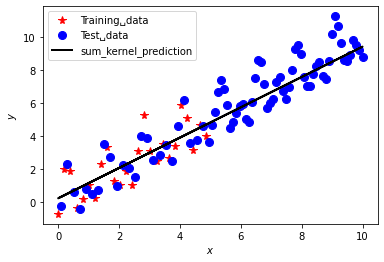

In [62]:
# plot data
fig = plt.subplot(111)
opt = {'marker': 'r*', 'label': 'Training␣data'} 
plot_helpers.plot_data(Xtr, Ytr, fig=fig, options=opt)
opt = {'marker': 'bo', 'label': 'Test␣data'} 
plot_helpers.plot_data(Xtest, Ytest, fig=fig, options=opt) 
opt = {'marker': 'k-', 'label': 'sum_kernel_prediction',
'x_label': '$x$', 'y_label': '$y$', 'legend': True,
'linewidth': 2}
plot_helpers.plot_data(Xtemp, Ytemp, fig=fig, options=opt)